# Tokyo Olympics 2020

![olympics](https://stillmed.olympics.com/media/Images/OlympicOrg/News/2017/06/09/2017-06-09-tokyo2020-thumbnail.jpg?interpolation=lanczos-none&resize=2120:1200)

> **Table of Contents**
1. Introduction
2. Aim of the Project
3. Data Exploration & Visualization


> **Introduction**

The Olympics are leading international sporting events featuring summer and winter sports competitions in which thousands of athletes from over 200 nations participate in a variety of competitions. The olympic games are held every four years alternating between Summer and Winter Olympics every two years in a four year period.

The summer olympics of 2020, was held in Tokyo from 23 July to 8 August 2021. The event was postponed to 2021 as a result of the COVID-19 pandemic. 

> **Aim of the Project**

I have performed Explanatory Data Analysis for the Tokyo Olympics Dataset. Pandas is used for data manipulation and plotly is used for visualization purposes.

> **Data Exploration & Visualization**

Importing libraries and reading the dataset

In [1]:
import pandas as pd 
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
!pip install openpyxl

You should consider upgrading via the '/Users/priyanka/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
entries_gender = pd.read_excel('EntriesGender.xlsx')
teams = pd.read_excel('Teams.xlsx')
athletes = pd.read_excel('Athletes.xlsx')
coaches = pd.read_excel('Coaches.xlsx')
medals = pd.read_excel('Medals.xlsx')

/Users/priyanka/opt/anaconda3/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



**athletes** provides information about the athletes participating in Olympics.
**coaches** provides information about the coach, their sport and country of origin.
**teams** provides information on the sport teams, event of participation and country of origin.
**medals** provides information on the number of gold, silver and bronze medals won by a country.
**entries_gender** provides information about the number of males and females participating in different sports.

**athletes**

In [3]:
athletes.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


**coaches**

In [4]:
coaches.head()

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


**teams**

In [5]:
teams.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


**medals**

In [6]:
medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


**entries_gender**

In [7]:
entries_gender.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [8]:
print("The number of athletes that participated in Olympics 2020 is " + str(athletes.shape[0]))
print("The number of sports categories in Olympics 2020 is " + str(athletes.Discipline.nunique()))
print("The number of countries that participated in Olympics 2020 is " + str(athletes.NOC.nunique()))
print("The number of coaches present in Olympics 2020 is " + str(coaches.shape[0]))

The number of athletes that participated in Olympics 2020 is 11085
The number of sports categories in Olympics 2020 is 46
The number of countries that participated in Olympics 2020 is 206
The number of coaches present in Olympics 2020 is 394


****

**Distribution of Athletes across different Sports**

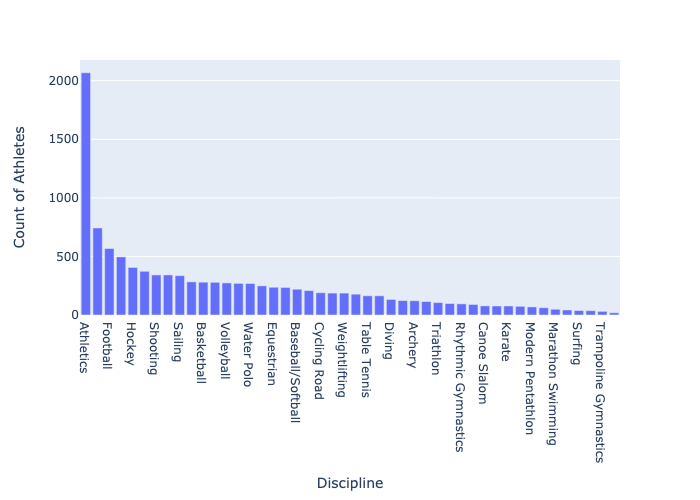

In [9]:
num_athletes_sportwise = athletes.pivot_table(index ='Discipline',values='Name',aggfunc=pd.Series.nunique)
num_athletes_sportwise.reset_index(inplace = True)
num_athletes_sportwise.rename(columns = {'Name':'Count of Athletes'}, inplace = True)
num_athletes_sportwise.sort_values(by =['Count of Athletes'],ascending=False, inplace = True)
fig = px.bar(num_athletes_sportwise,x = 'Discipline', y='Count of Athletes' )
fig.show(renderer='png')

* Sports such as Athletics, Swimming and Football receive highest participation.
* Cycling, Trampoline Gymnastics and Sport Climbing BMX Freestyle receive lowest participation.

**Distribution of Athletes across Countries**

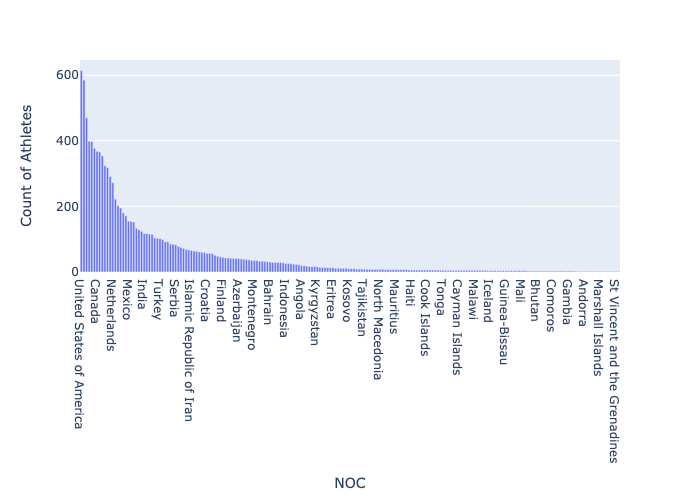

In [10]:
num_athletes_countrywise = athletes.pivot_table(index ='NOC',values='Name',aggfunc=pd.Series.nunique)
num_athletes_countrywise.reset_index(inplace = True)
num_athletes_countrywise.rename(columns = {'Name':'Count of Athletes'}, inplace = True)
num_athletes_countrywise.sort_values(by =['Count of Athletes'],ascending=False, inplace = True)
fig = px.bar(num_athletes_countrywise,x = 'NOC', y='Count of Athletes' )
fig.show(renderer='png')

* Most athletes belong to United States of America, Japan, Australia, Germany and People's Republic of China.

**Distribution of Coaches across different Sport Categories**

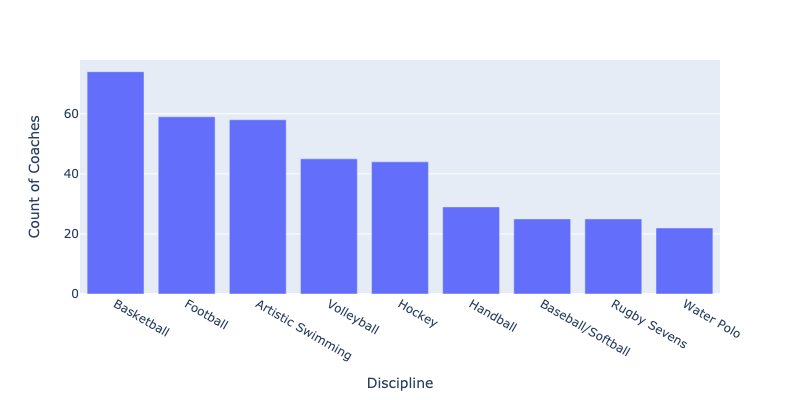

In [11]:
num_coaches_sportwise = coaches.pivot_table(index ='Discipline',values='Name',aggfunc=pd.Series.nunique)
num_coaches_sportwise.reset_index(inplace = True)
num_coaches_sportwise.rename(columns = {'Name':'Count of Coaches'}, inplace = True)
num_coaches_sportwise.sort_values(by =['Count of Coaches'],ascending=False, inplace = True)
fig = px.bar(num_coaches_sportwise,x = 'Discipline', y='Count of Coaches',width=800, height=400 )
fig.show(renderer='png')

Coaches are present for 9 sport categories amongst which Basketball, Football and Artistic Swimming have the highest number of coaches allocated.

**Distribution of Coaches across different Countries**

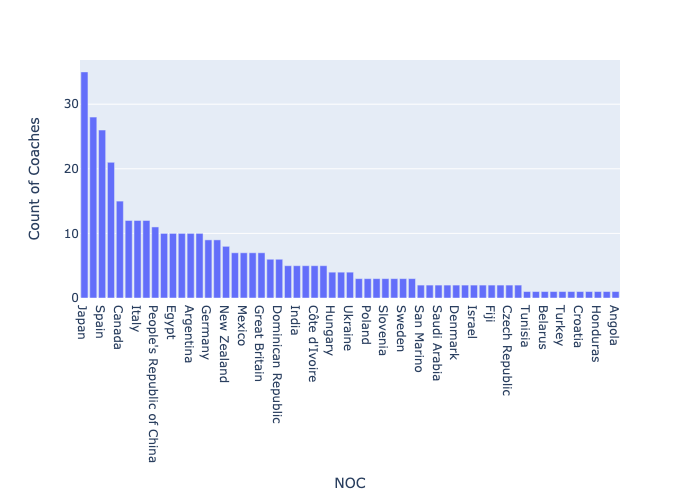

In [12]:
num_coaches_countrywise = coaches.pivot_table(index ='NOC',values='Name',aggfunc=pd.Series.nunique)
num_coaches_countrywise.reset_index(inplace = True)
num_coaches_countrywise.rename(columns = {'Name':'Count of Coaches'}, inplace = True)
num_coaches_countrywise.sort_values(by =['Count of Coaches'],ascending=False, inplace = True)
fig = px.bar(num_coaches_countrywise,x = 'NOC', y='Count of Coaches' )
fig.show(renderer='png')

* Amongst 206 participating countries, only 61 have coaches.

****

To analyse further, I created a variable **sport_country** signifying the team on the basis of sports and country. There are 400 sport teams in total. These teams include men and women participants.

In [13]:
teams['sport_country'] = teams['Discipline']+"_"+teams['NOC'] 

**Number of events participated by a sports team**

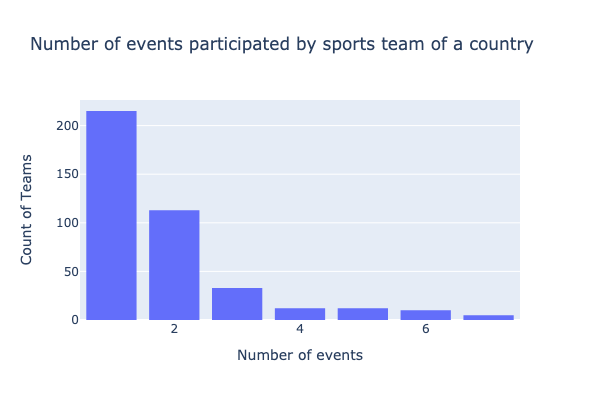

In [14]:
df = teams['sport_country'].value_counts().to_frame()
df.rename(columns={"sport_country": "Number of events"}, inplace = True)
fig = px.histogram(df, x="Number of events",width=600, height=400, title = "Number of events participated by sports team of a country")
fig.update_layout(bargap=0.2,yaxis_title="Count of Teams" )
fig.show(renderer='png')

* 215 out of 400 teams (on the basis of country and sport category) participated in a single event.
* Maximum number of events participated by a team is 7. There are 5 such teams.

****

**Does every Athlete belong to a team?**

I calculated the **sport_country** variable for every athlete. If the **sport_country** variable for an athlete is present in the **teams** table then the athlete belongs to a team. 

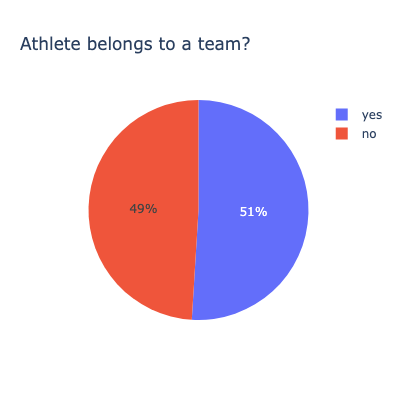

In [15]:
sport_country = teams.sport_country.unique()
athletes['sport_country']=athletes['Discipline']+"_"+athletes['NOC']
athletes['in_a_team'] = ['yes' if x in sport_country else 'no' for x in athletes['sport_country']]

df = athletes.in_a_team.value_counts().to_frame()
df.reset_index(inplace = True)
fig = px.pie(df, values='in_a_team', names='index', title='Athlete belongs to a team?',width = 400, height = 400)
fig.show(renderer='png')

* 49% of athletes don't belong to a team whereas the rest 51% do.

****

The **sport_country** variable was also calculated for coaches to see which teams have coaches.

In [16]:
coaches['sport_country']=coaches['Discipline']+"_"+coaches['NOC']

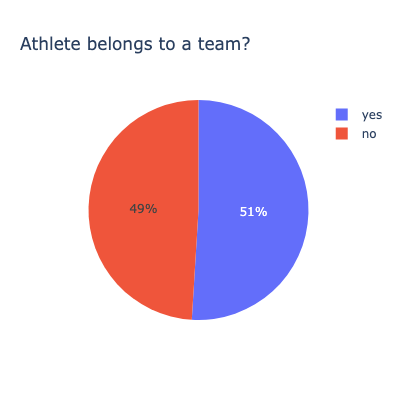

In [17]:
coach_sport_country = coaches.sport_country.unique()
teams['has_coach'] = [True if x in coach_sport_country else False for x in teams['sport_country']]
fig.show(renderer='png')

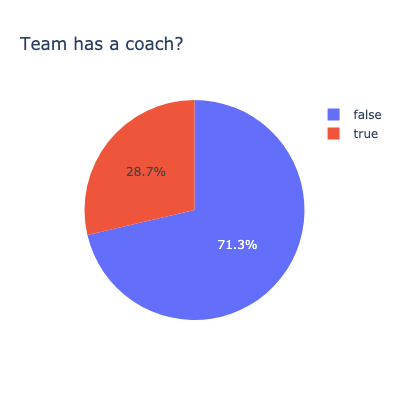

In [18]:
df = teams.has_coach.value_counts().to_frame()
df.reset_index(inplace = True)
fig = px.pie(df, values='has_coach', names='index', title='Team has a coach?',width = 400, height = 400)
fig.show(renderer='png')

* 71.3% of teams don't have a coach.

**Distribution of Teams across Sports**

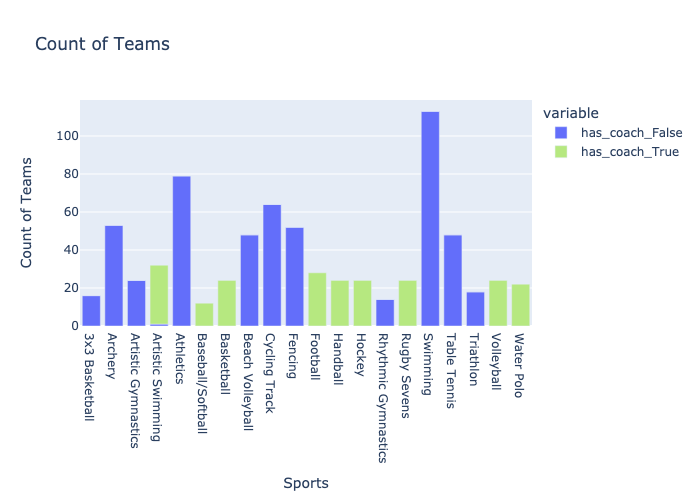

In [19]:
df = pd.get_dummies(teams, columns = ['has_coach'])
df = df.pivot_table(index='Discipline', values=['has_coach_True','has_coach_False'], aggfunc=pd.Series.sum)
df.reset_index(inplace=True)
fig = px.bar(df, x ='Discipline',y=['has_coach_False','has_coach_True'], color_discrete_sequence =['#636EFA', '#B6E880'], title ="Count of Teams")
fig.update_layout(
    xaxis_title="Sports",
    yaxis_title="Count of Teams")
fig.show(renderer='png')

* Most teams from Swimming, Athletics and Cycling Track background see the highest numbers.
* From the above graph, it can be concluded that the presence of coach for a team depends on the sport category of the team

****

To classify the event as men, women or mixed, a variable **event_type** was created.

In [20]:
def event_type(string):
    if ("women" in string.lower()):
        return "women"
    elif ("men" in string.lower()):
        return "men"
    else:
        return "mixed"
    

teams['event_type'] = teams.Event.apply(lambda x: event_type(x))
teams.head()

,Name,Discipline,NOC,Event,sport_country,has_coach,event_type
0,Belgium,3x3 Basketball,Belgium,Men,3x3 Basketball_Belgium,False,men
1,China,3x3 Basketball,People's Republic of China,Men,3x3 Basketball_People's Republic of China,False,men
2,China,3x3 Basketball,People's Republic of China,Women,3x3 Basketball_People's Republic of China,False,women
3,France,3x3 Basketball,France,Women,3x3 Basketball_France,False,women
4,Italy,3x3 Basketball,Italy,Women,3x3 Basketball_Italy,False,women


**Distribution of Event Types**

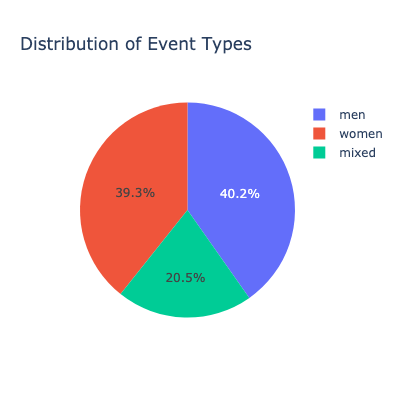

In [21]:
df = teams.event_type.value_counts().to_frame()
df.reset_index(inplace=True)
df.head()
fig = px.pie(df,values='event_type',names='index',width=400, height=400,title="Distribution of Event Types")
fig.show(renderer='png')

* The number of men and women events are almost similar.

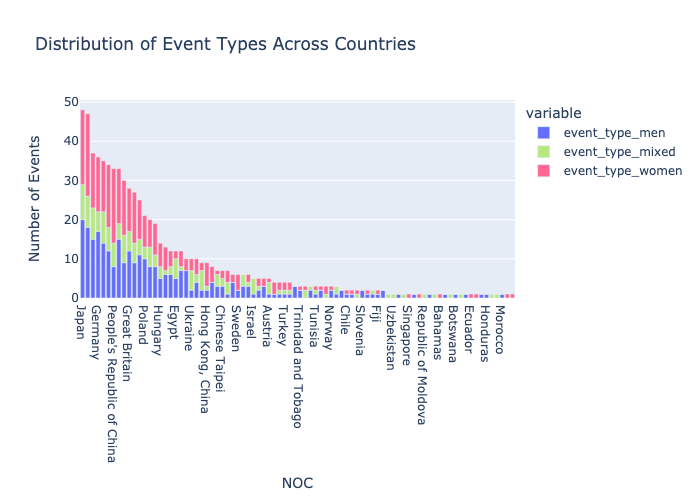

In [22]:
df = pd.get_dummies(teams, columns = ['event_type'])
df.reset_index(inplace=True)
df = df.pivot_table(index='NOC', values=['event_type_men','event_type_mixed','event_type_women'], aggfunc=pd.Series.sum)
df.reset_index(inplace=True)
df['total'] = df['event_type_men']+df['event_type_mixed']+df['event_type_women']
df.sort_values(by=['total'], ascending=False, inplace = True)
fig = px.bar(df, x ='NOC',y=['event_type_men','event_type_mixed','event_type_women'], color_discrete_sequence =['#636EFA', '#B6E880', '#FF6692'], title = "Distribution of Event Types Across Countries")
fig.update_layout(
    xaxis_title="NOC",
    yaxis_title="Number of Events")
fig.show(renderer='png')

* Teams from Japan followed by The United States of America and Italy participated more in events.
* Some countries such as Singapore, Angola, Bahamas, Ecuador had women teams only.
* Some countires such as Portugal, Croatia, Venezuela, Saudi Arabia had men teams only. 
* Countries such as Slovakia, Uzbekistan, Vietnam had mixed teams only. 

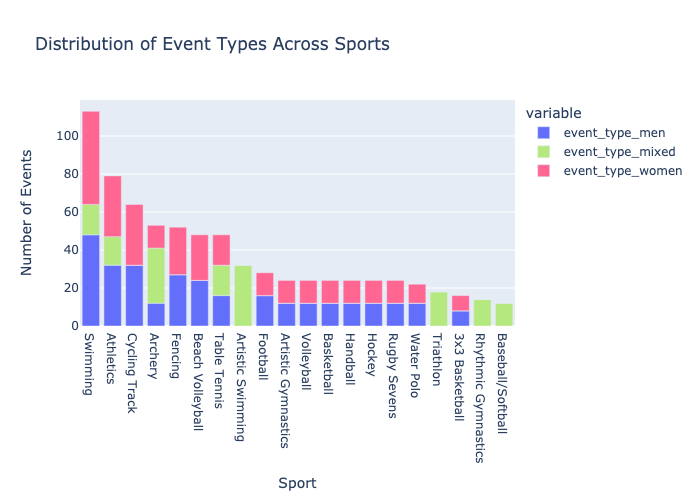

In [23]:
df = pd.get_dummies(teams, columns = ['event_type'])
df.reset_index(inplace=True)
df = df.pivot_table(index='Discipline', values=['event_type_men','event_type_mixed','event_type_women'], aggfunc=pd.Series.sum)
df.reset_index(inplace=True)
df['total'] = df['event_type_men']+df['event_type_mixed']+df['event_type_women']
df.sort_values(by=['total'], ascending=False, inplace = True)
fig = px.bar(df, x ='Discipline',y=['event_type_men','event_type_mixed','event_type_women'], color_discrete_sequence =['#636EFA', '#B6E880', '#FF6692'], title ="Distribution of Event Types Across Sports")
fig.update_layout(
    xaxis_title="Sport",
    yaxis_title="Number of Events")
fig.show(renderer='png')

* Artistic Swimming, Trialthon, Rhythmic Gymnastics and Baseball Softball are sports categories that have mixed teams only

****

**Distribution of Medal Across Countries**

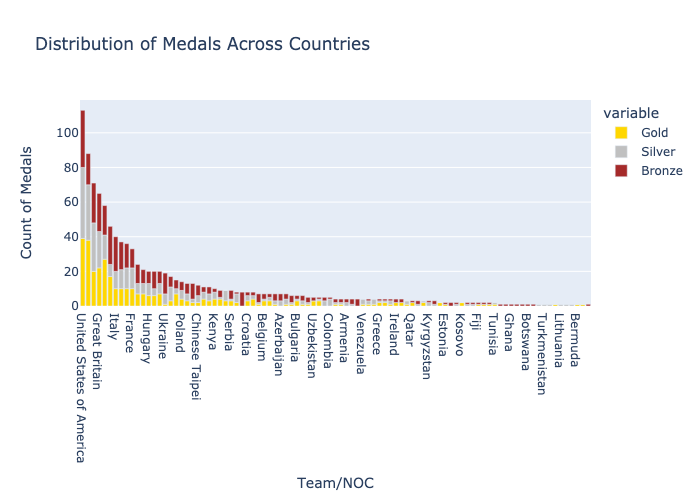

In [24]:
medals.sort_values(by='Total', ascending=False, inplace = True)
fig = px.bar(medals,x='Team/NOC',y=['Gold','Silver','Bronze'],color_discrete_sequence =['gold', 'silver', 'brown'], title = "Distribution of Medals Across Countries")
fig.update_layout(yaxis_title = 'Count of Medals')
fig.show(renderer='png')

****

**Sport Participation by Gender**

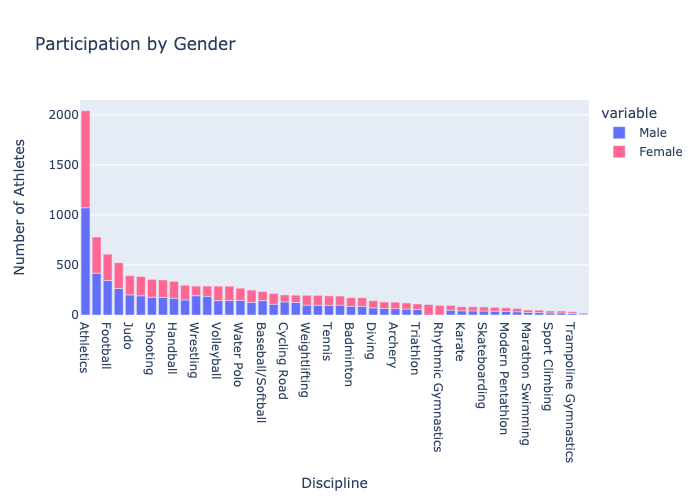

In [25]:
entries_gender.sort_values(by='Total', ascending=False, inplace = True)
fig = px.bar(entries_gender,x='Discipline',y=['Male','Female'],color_discrete_sequence =['#636EFA', '#FF6692'], title = "Participation by Gender")
fig.update_layout(yaxis_title = 'Number of Athletes')
fig.show(renderer='png')

* Artistic Swimming and Rhythmic Gymnastics were labelled as mixed event sport categories earlier, however they have only female participants.

****

**Summary**

We have dived deep regarding the following issues -
* Medals won by different countries 
* The number of athletes from every country 
* The number of athletes participating in different sports 
* The number of coaches from different country
* The number of coaches for different sports
* Aggregated teams on the basis of sports and country to identify the presence of coaches 
* Identified the event types - male, female , mixed for teams
* Gender based participation in different sports.

****

**Thank you for viewing! Please upvote if you liked the analysis and provide feedback as to what could have been done better :)**